# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 43.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

(4324, 9)

In [7]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [233]:
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any duplicates? False


In [162]:
print(f'Any NaN values among the data? {df_data.isna().values.any()}')

Any NaN values among the data? True


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [39]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [8]:
df_data.drop(["Unnamed: 0", 'Unnamed: 0.1'], inplace=True, axis=1)

In [10]:
df_data.shape

(4324, 7)

## Descriptive Statistics

In [166]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [167]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [9]:
space_mission_per_organization = df_data.Organisation.value_counts()
v_bar = px.bar(
        x = space_mission_per_organization.index,
        y = space_mission_per_organization.values,
        color = space_mission_per_organization.values,
        color_continuous_scale='Aggrnyl',
        title='Number of space mission per organization')

v_bar.update_layout(xaxis_title='Organization Name',
                    coloraxis_showscale=False,
                    yaxis_title='Number of Space Mission')
v_bar.show()

\# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [10]:
rocket = df_data.Rocket_Status.value_counts()
fig = px.pie(labels=rocket.index,
             values=rocket.values,
             title="Number of Active versus Retired Rockets",
             names=rocket.index,
             hole=0.4,)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [11]:
rocket

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [12]:
mission = df_data.Mission_Status.value_counts()
fig = px.pie(labels=mission.index,
             values=mission.values,
             title="Distribution of Mission Status",
             names=mission.index,
             hole=0.4,)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [239]:
mission

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [13]:
df_data["price"] = df_data[df_data["Price"].notna()]["Price"].str.replace(',', '').astype(float)

In [14]:
df_data.price.describe()

count     964.00
mean      153.79
std       288.45
min         5.30
25%        40.00
50%        62.00
75%       164.00
max     5,000.00
Name: price, dtype: float64

In [15]:
hist = px.histogram(x=df_data.Price,
                   nbins=10,)

hist.update_layout(xaxis_title='USD millions',
                   yaxis_title='Count',
                   title='How Expensive are the Launches?')

hist.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [16]:
df_data["Country"] = df_data["Location"].str.split(", ").str[-1]

In [17]:
#change the country names that no longer exist
df_data.loc[(df_data["Country"] == 'Russia'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'New Mexico'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Yellow Sea'), "Country"] = "China"
df_data.loc[(df_data["Country"] == 'Shahrud Missile Test Site'), "Country"] = "Iran, Islamic Republic of"
df_data.loc[(df_data["Country"] == 'Pacific Missile Range Facility'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Barents Sea'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'Gran Canaria'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Iran'), "Country"] = "Iran, Islamic Republic of"
df_data.loc[(df_data["Country"] == 'South Korea'), "Country"] = "Korea, Republic of"
df_data.loc[(df_data["Country"] == 'North Korea'), "Country"] = "Korea, Democratic People's Republic of"
df_data.loc[(df_data["Country"] == 'Kazakhstan'), "Country"] = "Russian Federation"

In [18]:
#convert the country names to Alpha3 format
for c in countries:
  df_data.loc[(df_data.Country == c.name), "Country"] = c.alpha3

In [19]:
launches = df_data["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches


,Country,counts
0,RUS,2099
1,USA,1351
2,FRA,303
3,CHN,269
4,JPN,126
5,IND,76
6,Pacific Ocean,36
7,IRN,14
8,NZL,13
9,ISR,11


In [20]:
world_map = px.choropleth(launches,
                          locations="Country",
                          color="counts",
                          hover_name='Country',
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [21]:
statuses = df_data.groupby("Country")["Mission_Status"].value_counts().rename_axis(["Country", "Status"]).reset_index(name='counts')
failures = statuses[statuses["Status"].str.contains("Fail")].groupby("Country").sum()


<ipython-input-21-26e526156a2f>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [22]:
world_map = px.choropleth(failures,
                          locations=failures.index,
                          color="counts",
                          hover_name=failures.index,
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [23]:
country_org = df_data.groupby(by=['Country','Organisation', 'Mission_Status'], as_index=False).size()
country_org = country_org.sort_values("size", ascending=False)


In [24]:
burst = px.sunburst(country_org,
                    path=['Country', 'Organisation', 'Mission_Status'],
                    values="size",
                    title="Missions By Country"
                   )


burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [25]:
price_mission_per_organization = df_data.groupby(["Organisation"], as_index=False).agg({'price': pd.Series.sum})

price_mission_per_organization = price_mission_per_organization.sort_values('price', ascending=False).dropna()
price_mission_per_organization

,Organisation,price
35,NASA,"76,280.00"
3,Arianespace,"16,345.00"
48,ULA,"14,798.00"
40,RVSN USSR,"10,000.00"
7,CASC,"6,340.26"
46,SpaceX,"5,444.00"
36,Northrop,"3,930.00"
32,MHI,"3,532.50"
23,ISRO,"2,177.00"
49,US Air Force,"1,550.92"


In [26]:
v_bar = px.bar(
        x = price_mission_per_organization.Organisation,
        y = price_mission_per_organization.price,
        color = price_mission_per_organization.price,
        color_continuous_scale='Aggrnyl',
        title='Total Amount of Money Spent by Organisation on Space Missions')

v_bar.update_layout(xaxis_title='Organization Name',
                    coloraxis_showscale=False,
                    yaxis_title='Total Amount of Money Spent(USD Million)')
v_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [27]:
price_mission_per_organization = df_data.groupby(["Organisation"], as_index=False).agg({'price': pd.Series.mean})

price_mission_per_organization = price_mission_per_organization.sort_values('price', ascending=False).dropna()
price_mission_per_organization

,Organisation,price
40,RVSN USSR,"5,000.00"
35,NASA,511.95
6,Boeing,177.29
3,Arianespace,170.26
48,ULA,151.00
19,ILS,101.54
32,MHI,95.47
34,Martin Marietta,80.16
49,US Air Force,59.65
24,JAXA,56.00


In [28]:
v_bar = px.bar(
        x = price_mission_per_organization.Organisation,
        y = price_mission_per_organization.price,
        color = price_mission_per_organization.price,
        color_continuous_scale='Aggrnyl',
        title='Total Amount of Money Spent by Organisation on Space Missions')

v_bar.update_layout(xaxis_title='Organization Name',
                    coloraxis_showscale=False,
                    yaxis_title='Total Amount of Money Spent(USD Million)')
v_bar.show()

# Chart the Number of Launches per Year

In [37]:
df_data["year"] = df_data["Date"].str.split(" ").str[3].astype(int)

In [38]:
df_data.year.head()

0    2020
1    2020
2    2020
3    2020
4    2020
Name: year, dtype: int64

In [40]:
launch_per_year = df_data.groupby(["year"], as_index=False).agg({'Country': pd.Series.count})

launch_per_year = launch_per_year.sort_values('year', ascending=False)
launch_per_year

,year,Country
63,2020,63
62,2019,109
61,2018,117
60,2017,92
59,2016,90
...,...,...
4,1961,52
3,1960,39
2,1959,20
1,1958,28


In [52]:
v_bar = px.bar(
        x = launch_per_year.year,
        y = launch_per_year.Country,
        color = launch_per_year.Country,
        color_continuous_scale='Aggrnyl',
        title='Number of Launches per Year')

v_bar.update_layout(xaxis_title='Year',
                    coloraxis_showscale=False,
                    yaxis_title='Number of lauches')
v_bar.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [54]:
df_data['date'] = pd.to_datetime(df_data['Date'])
df_data.date.head()

0    2020-08-07 05:12:00+00:00
1    2020-08-06 04:01:00+00:00
2    2020-08-04 23:57:00+00:00
3    2020-07-30 21:25:00+00:00
4    2020-07-30 11:50:00+00:00
Name: date, dtype: object

In [ ]:
launch_per_month = df_data["month"].value_counts().rename_axis("month").reset_index(name='counts')

launch_per_month = launch_per_month.sort_values('counts', ascending=False)

In [ ]:
moving_average = prize_per_year.rolling(window=5).mean()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [69]:
df_data["month"] = df_data["Date"].str.split(" ").str[1]

In [70]:
launch_per_month = df_data["month"].value_counts().rename_axis("month").reset_index(name='counts')

launch_per_month = launch_per_month.sort_values('counts', ascending=False)
launch_per_month

,month,counts
0,Dec,450
1,Jun,402
2,Apr,383
3,Oct,381
4,Aug,373
5,Sep,365
6,Mar,353
7,Jul,351
8,Feb,336
9,Nov,336


In [71]:
v_bar = px.bar(
        x = launch_per_month.month,
        y = launch_per_month.counts,
        color = launch_per_month.counts,
        color_continuous_scale='Aggrnyl',
        title='Number of Launches per month')

v_bar.update_layout(xaxis_title='Month',
                    coloraxis_showscale=False,
                    yaxis_title='Number of lauches')
v_bar.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [80]:
price_per_year = df_data.groupby(["year"], as_index=False).agg({'price': pd.Series.mean})
price_per_year = price_per_year.sort_values('year', ascending=False)


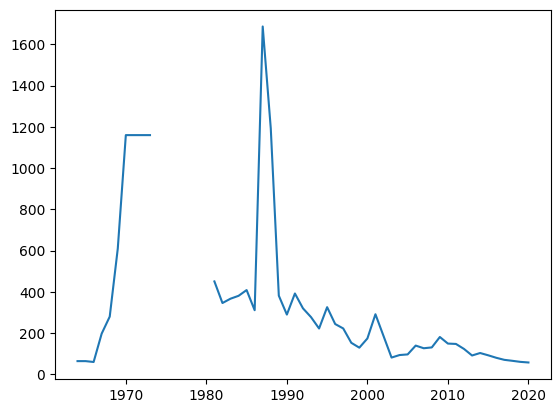

In [83]:
plt.plot(
        price_per_year.year,
        price_per_year.price,
        )

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [86]:
top_10_org = space_mission_per_organization[:10].index
top_10_org

Index(['RVSN USSR', 'Arianespace', 'CASC', 'General Dynamics', 'NASA',
       'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta'],
      dtype='object')

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [93]:
space_race_df = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]
space_race_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,price,Country,year,date,month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,50.00,USA,2020,2020-08-07 05:12:00+00:00,Aug
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,NaN,USA,2020,2020-08-04 23:57:00+00:00,Aug
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,65.00,RUS,2020,2020-07-30 21:25:00+00:00,Jul
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,145.00,USA,2020,2020-07-30 11:50:00+00:00,Jul
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,48.50,RUS,2020,2020-07-23 14:26:00+00:00,Jul


In [94]:
cold_war_years = space_race_df.sort_values("year")
cold_war_years[(cold_war_years.year <= 1991)]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,price,Country,year,date,month
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,NaN,RUS,1957,1957-10-04 19:28:00+00:00,Oct
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,NaN,RUS,1957,1957-11-03 02:30:00+00:00,Nov
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,NaN,USA,1957,1957-12-06 16:44:00+00:00,Dec
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,NaN,USA,1958,1958-02-01 03:48:00+00:00,Feb
4293,US Air Force,"LC-11, Cape Canaveral AFS, Florida, USA","Thu Dec 18, 1958 23:02 UTC",SM-65B Atlas | SCORE,StatusRetired,NaN,Success,NaN,USA,1958,1958-12-18 23:02:00+00:00,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...
1755,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Apr 28, 1991 11:33 UTC",Space Shuttle Discovery | STS-39,StatusRetired,450.0,Success,450.00,USA,1991,1991-04-28 11:33:00+00:00,Apr
1754,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Tue May 14, 1991 15:52 UTC",Atlas-E/F Star-37S-ISS | NOAA-D,StatusRetired,NaN,Success,NaN,USA,1991,1991-05-14 15:52:00+00:00,May
1753,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Thu May 16, 1991 21:40 UTC",Tsyklon-3 | Cosmos 2143 to 2148,StatusRetired,NaN,Success,NaN,RUS,1991,1991-05-16 21:40:00+00:00,May
1762,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia","Fri Mar 22, 1991 12:19 UTC",Molniya-M /Block ML | Molniya-3 n†­148,StatusRetired,NaN,Success,NaN,RUS,1991,1991-03-22 12:19:00+00:00,Mar


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [97]:
launch_space_race = space_race_df.Country.value_counts()
fig = px.pie(labels=launch_space_race.index,
             values=launch_space_race.values,
             title="Number of Launches of  the USSR and the USA",
             names=launch_space_race.index,
             hole=0.4,)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

<Axes: xlabel='year'>

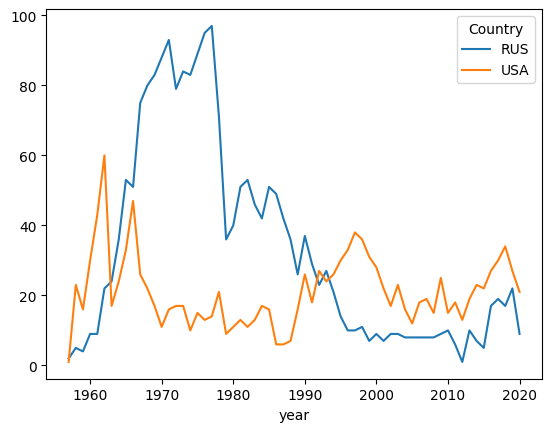

In [124]:
space_race_df.groupby(["year", "Country"]).size().unstack().plot()

## Chart the Total Number of Mission Failures Year on Year.

In [126]:
new_df = df_data[df_data['Mission_Status'].str.contains("Failure")]


<Axes: xlabel='year'>

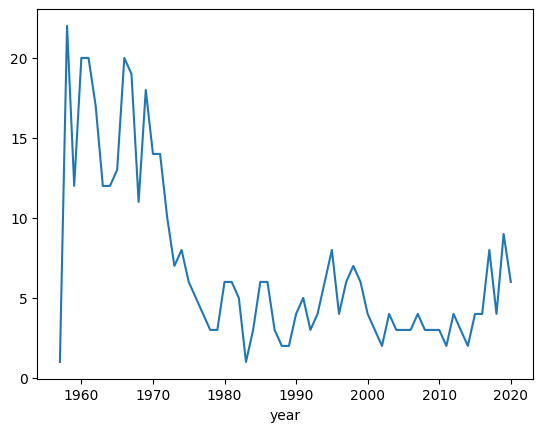

In [128]:
new_df.groupby(["year"]).size().plot()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [134]:
country_launches = df_data.groupby("year")["Country"].value_counts().rename_axis(["year", "Country"]).reset_index(name='counts')

# group by year, then by country, then find max count
country_launches = country_launches.loc[country_launches.groupby("year")["counts"].idxmax()]
country_launches.head()

,year,Country,counts
0,1957,RUS,2
2,1958,USA,23
4,1959,USA,16
6,1960,USA,30
8,1961,USA,43


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [139]:
org_launches = df_data.groupby("year")["Organisation"].value_counts().rename_axis(["year", "Organisation"]).reset_index(name='counts')

# group by year, then by country, then find max count
org_launches.loc[org_launches.groupby("year")["counts"].idxmax()]
org_launches.head()

,year,Organisation,counts
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,US Navy,12
3,1958,AMBA,7
4,1958,RVSN USSR,5


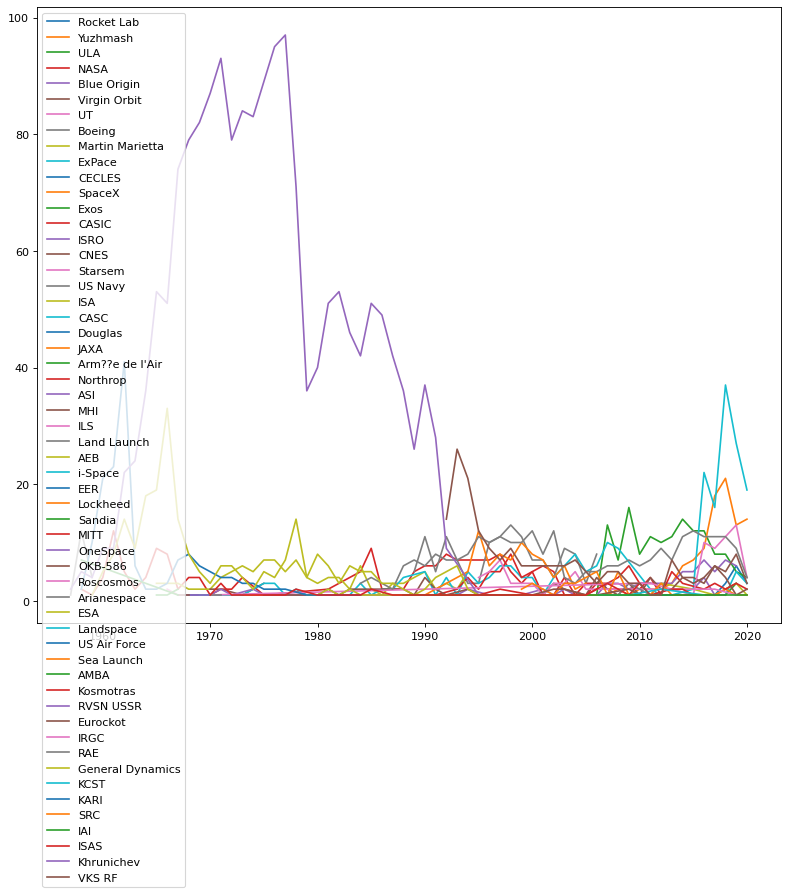

In [140]:
org_set = set(org_launches['Organisation'])

plt.figure(figsize=(12, 10), dpi=80)
for org in org_set:
     selected_data = org_launches.loc[org_launches['Organisation'] == org]
     plt.plot(selected_data['year'], selected_data['counts'], label=org)

plt.legend()
plt.show()